<a href="https://colab.research.google.com/github/hwangsaeyeon/AAI-Web-Development/blob/main/DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [245]:
import pandas as pd 
from google.colab import drive
drive.mount('/content/drive')
!cd "/content/drive/My Drive/webdev"
!unzip -qq "/content/drive/My Drive/webdev/kbo_predict_data"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
replace Pre_Season_Batter.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


## 1. 데이터 불러오기 

In [484]:
data = pd.read_csv('/content/Regular_Season_Batter.csv')
data.head()

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,...,3,0.519,0.383,9,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.902
1,1,강경학,2011,한화,0.000,2,1,0,0,0,...,0,0.000,0.000,1,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.000
2,1,강경학,2014,한화,0.221,41,86,11,19,2,...,1,0.349,0.337,6,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.686
3,1,강경학,2015,한화,0.257,120,311,50,80,7,...,3,0.325,0.348,15,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.673
4,1,강경학,2016,한화,0.158,46,101,16,16,3,...,5,0.257,0.232,7,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.489


In [485]:
data.shape

(2454, 29)

## 2. 데이터 전처리 

In [486]:
low_game = []
for i in range(len(data)):
  if data['G'][i] < 50:
    low_game.append(i)
df = data.drop(low_game, axis = 0)
df

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,...,3,0.519000,0.383000,9,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.902000
3,1,강경학,2015,한화,0.257,120,311,50,80,7,...,3,0.325000,0.348000,15,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.673000
5,1,강경학,2017,한화,0.214,59,84,17,18,2,...,1,0.262000,0.290000,4,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.552000
6,1,강경학,2018,한화,0.278,77,245,42,68,11,...,7,0.392000,0.382000,2,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.774000
19,297,진갑용,1997,OB,0.242,95,281,21,68,7,...,7,0.309609,0.306189,6,NaN,1974년 05월 08일,NaN,하단초-초량중-부산고-고려대-OB-두산-삼성,NaN,0.615797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2441,342,황재균,2014,롯데,0.321,128,486,66,156,33,...,8,0.475000,0.388000,16,183cm/96kg,1987년 07월 28일,내야수(우투우타),사당초-이수중-경기고-현대-우리-히어로즈-넥센-롯데-샌프란시스코,6000만원,0.863000
2442,342,황재균,2015,롯데,0.290,144,534,95,155,41,...,14,0.521000,0.350000,16,183cm/96kg,1987년 07월 28일,내야수(우투우타),사당초-이수중-경기고-현대-우리-히어로즈-넥센-롯데-샌프란시스코,6000만원,0.871000
2443,342,황재균,2016,롯데,0.335,127,498,97,167,26,...,10,0.570000,0.394000,15,183cm/96kg,1987년 07월 28일,내야수(우투우타),사당초-이수중-경기고-현대-우리-히어로즈-넥센-롯데-샌프란시스코,6000만원,0.964000
2444,342,황재균,2018,KT,0.296,142,530,76,157,41,...,5,0.526000,0.358000,17,183cm/96kg,1987년 07월 28일,내야수(우투우타),사당초-이수중-경기고-현대-우리-히어로즈-넥센-롯데-샌프란시스코,6000만원,0.884000


In [487]:
import random
victory = []
for i in range(len(df)):
    victory.append(random.randint(0,1))
df['victory'] = victory
df.head()

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS,victory
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,...,0.519000,0.383000,9,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.902000,0
3,1,강경학,2015,한화,0.257,120,311,50,80,7,...,0.325000,0.348000,15,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.673000,1
5,1,강경학,2017,한화,0.214,59,84,17,18,2,...,0.262000,0.290000,4,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.552000,0
6,1,강경학,2018,한화,0.278,77,245,42,68,11,...,0.392000,0.382000,2,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.774000,1
19,297,진갑용,1997,OB,0.242,95,281,21,68,7,...,0.309609,0.306189,6,NaN,1974년 05월 08일,NaN,하단초-초량중-부산고-고려대-OB-두산-삼성,NaN,0.615797,1


In [488]:
import numpy as np

# Convenience things for you, note that releaseyear is continuous but is not a Spotify API variable
CATEGORICAL_FEATURES = ['position']

# Read in the data

from sklearn.preprocessing import LabelEncoder
for col in CATEGORICAL_FEATURES:
  le = LabelEncoder()
  
  le.fit(df[col])
  df[col] = le.transform(df[col])

df

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS,victory
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,...,0.519000,0.383000,9,177cm/93kg,1985년 04월 12일,1,쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.902000,0
3,1,강경학,2015,한화,0.257,120,311,50,80,7,...,0.325000,0.348000,15,180cm/72kg,1992년 08월 11일,2,광주대성초-광주동성중-광주동성고,10000만원,0.673000,1
5,1,강경학,2017,한화,0.214,59,84,17,18,2,...,0.262000,0.290000,4,180cm/72kg,1992년 08월 11일,2,광주대성초-광주동성중-광주동성고,10000만원,0.552000,0
6,1,강경학,2018,한화,0.278,77,245,42,68,11,...,0.392000,0.382000,2,180cm/72kg,1992년 08월 11일,2,광주대성초-광주동성중-광주동성고,10000만원,0.774000,1
19,297,진갑용,1997,OB,0.242,95,281,21,68,7,...,0.309609,0.306189,6,NaN,1974년 05월 08일,10,하단초-초량중-부산고-고려대-OB-두산-삼성,NaN,0.615797,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2441,342,황재균,2014,롯데,0.321,128,486,66,156,33,...,0.475000,0.388000,16,183cm/96kg,1987년 07월 28일,1,사당초-이수중-경기고-현대-우리-히어로즈-넥센-롯데-샌프란시스코,6000만원,0.863000,0
2442,342,황재균,2015,롯데,0.290,144,534,95,155,41,...,0.521000,0.350000,16,183cm/96kg,1987년 07월 28일,1,사당초-이수중-경기고-현대-우리-히어로즈-넥센-롯데-샌프란시스코,6000만원,0.871000,0
2443,342,황재균,2016,롯데,0.335,127,498,97,167,26,...,0.570000,0.394000,15,183cm/96kg,1987년 07월 28일,1,사당초-이수중-경기고-현대-우리-히어로즈-넥센-롯데-샌프란시스코,6000만원,0.964000,1
2444,342,황재균,2018,KT,0.296,142,530,76,157,41,...,0.526000,0.358000,17,183cm/96kg,1987년 07월 28일,1,사당초-이수중-경기고-현대-우리-히어로즈-넥센-롯데-샌프란시스코,6000만원,0.884000,0


In [489]:
value = ['avg', 'G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'TB', 'RBI', 'SB', 'CS', 'BB', 'HBP', 'SO', 'GDP', 'SLG', 'OBP', 
'E', 'position', 'OPS']
from sklearn.preprocessing import StandardScaler
df[value] = StandardScaler().fit_transform(df[value].values)
df = df.drop(labels=['batter_id','height/weight','year_born','career','starting_salary'],axis=1)
df

,batter_name,year,team,avg,G,AB,R,H,2B,3B,...,BB,HBP,SO,GDP,SLG,OBP,E,position,OPS,victory
0,가르시아,2018,LG,1.596061,-2.054276,-0.814318,-0.651075,-0.458418,-0.611438,-0.760182,...,-1.091629,0.692401,-1.120464,-0.813401,1.255347,0.771310,0.749939,-1.275233,1.139995,0
3,강경학,2015,한화,-0.243657,0.723997,0.111773,0.220170,-0.067629,-0.828345,1.374941,...,0.447991,-0.001609,0.095192,-0.813401,-0.720067,0.129396,1.969265,-1.001944,-0.438931,1
5,강경학,2017,한화,-1.208387,-1.697069,-1.530593,-1.029878,-1.413681,-1.370612,-0.226401,...,-1.141294,-0.926955,-1.341492,-1.249826,-1.361567,-0.934346,-0.266166,-1.001944,-1.273211,0
6,강경학,2018,한화,0.227490,-0.982656,-0.365743,-0.082872,-0.328155,-0.394532,-0.226401,...,0.348661,-0.232945,0.132030,0.059450,-0.037836,0.752970,-0.672607,-1.001944,0.257451,1
19,진갑용,1997,OB,-0.580191,-0.268244,-0.105279,-0.878357,-0.328155,-0.828345,-0.760182,...,-0.545312,0.229728,-0.420541,0.059450,-0.876791,-0.637435,0.140276,1.184367,-0.833336,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2441,황재균,2014,롯데,1.192220,1.041513,1.377915,0.826253,1.582370,1.991442,0.841160,...,1.093638,-0.464282,1.126658,0.277663,0.807315,0.863012,2.172486,-1.275233,0.871094,0
2442,황재균,2015,롯데,0.496717,1.676547,1.725199,1.924780,1.560659,2.859069,0.307379,...,0.845312,-0.232945,2.452828,1.586939,1.275712,0.166077,2.172486,-1.275233,0.926253,0
2443,황재균,2016,롯데,1.506318,1.001824,1.464736,2.000540,1.821185,1.232269,1.908722,...,0.894978,-0.232945,0.389897,0.714088,1.774657,0.973054,1.969265,-1.275233,1.567477,1
2444,황재균,2018,KT,0.631331,1.597168,1.696259,1.205056,1.604080,2.859069,0.841160,...,0.894978,-0.232945,2.379152,-0.376976,1.326625,0.312800,2.375707,-1.275233,1.015887,0


In [490]:
import seaborn as sns
import matplotlib.pyplot as plt 
corr = df.corr()
print(corr)

              year       avg         G        AB         R         H  \
year      1.000000  0.102340  0.028316  0.002919  0.060225  0.039403   
avg       0.102340  1.000000  0.501846  0.641664  0.679331  0.759329   
G         0.028316  0.501846  1.000000  0.890187  0.791825  0.844799   
AB        0.002919  0.641664  0.890187  1.000000  0.905811  0.975313   
R         0.060225  0.679331  0.791825  0.905811  1.000000  0.930171   
H         0.039403  0.759329  0.844799  0.975313  0.930171  1.000000   
2B        0.044430  0.676377  0.747687  0.869536  0.838334  0.893406   
3B       -0.014926  0.275613  0.358481  0.406045  0.462703  0.407235   
HR        0.036291  0.497817  0.549752  0.647174  0.696047  0.672681   
TB        0.041040  0.727306  0.809727  0.939515  0.928037  0.966222   
RBI       0.074368  0.654981  0.740173  0.846088  0.830331  0.872764   
SB       -0.130391  0.254345  0.362406  0.425087  0.517804  0.414994   
CS       -0.139790  0.256375  0.401147  0.458137  0.487479  0.43

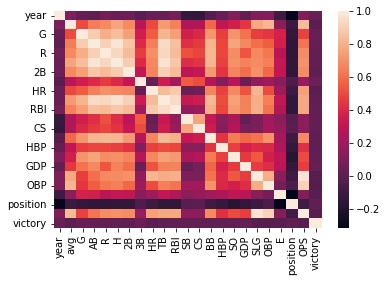

In [491]:
sns.heatmap(corr)
plt.show()

## 3. DNN

In [518]:
import numpy as np 

In [519]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1582 entries, 0 to 2452
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   batter_name  1582 non-null   object 
 1   year         1582 non-null   int64  
 2   team         1582 non-null   object 
 3   avg          1582 non-null   float64
 4   G            1582 non-null   float64
 5   AB           1582 non-null   float64
 6   R            1582 non-null   float64
 7   H            1582 non-null   float64
 8   2B           1582 non-null   float64
 9   3B           1582 non-null   float64
 10  HR           1582 non-null   float64
 11  TB           1582 non-null   float64
 12  RBI          1582 non-null   float64
 13  SB           1582 non-null   float64
 14  CS           1582 non-null   float64
 15  BB           1582 non-null   float64
 16  HBP          1582 non-null   float64
 17  SO           1582 non-null   float64
 18  GDP          1582 non-null   float64
 19  SLG   

In [535]:
#x는 학습데이터, y는 정답(label) 데이터
X = np.array(df)
y = np.array(df['victory'],dtype='float64')

In [536]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_train_real = pd.DataFrame(X_train).iloc[:,3:-1]
X_test_real = pd.DataFrame(X_test).iloc[:,3:-1]

In [537]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(1265, 25) (317, 25)
(1265,) (317,)


In [538]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
X_train_scaled = standard_scaler.fit_transform(X_train_real)
X_test_scaled = standard_scaler.transform(X_test_real)

In [539]:
import tensorflow as tf
input_shape = [X_train_scaled.shape[1]]
model = tf.keras.models.Sequential([
    tf.keras.layers.BatchNormalization(input_shape = input_shape),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(1,activation='sigmoid'),])

early_stop = tf.keras.callbacks.EarlyStopping(patience=50)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
hist = model.fit(X_train_scaled, y_train, epochs=100 ,validation_split=0.2,batch_size=64,callbacks=early_stop)
performance = model.evaluate(X_test_scaled, y_test, verbose=2)
print('정답률:',performance[1], 'loss:', performance[0])

Epoch 1/100
16/16 [==============================] - 2s 21ms/step - loss: 0.9480 - accuracy: 0.5049 - val_loss: 0.6960 - val_accuracy: 0.5020
Epoch 2/100
16/16 [==============================] - 0s 9ms/step - loss: 0.8537 - accuracy: 0.5287 - val_loss: 0.6954 - val_accuracy: 0.4901
Epoch 3/100
16/16 [==============================] - 0s 9ms/step - loss: 0.8435 - accuracy: 0.5198 - val_loss: 0.6973 - val_accuracy: 0.4783
Epoch 4/100
16/16 [==============================] - 0s 8ms/step - loss: 0.7634 - accuracy: 0.5553 - val_loss: 0.6979 - val_accuracy: 0.4901
Epoch 5/100
16/16 [==============================] - 0s 8ms/step - loss: 0.7832 - accuracy: 0.5741 - val_loss: 0.6972 - val_accuracy: 0.5059
Epoch 6/100
16/16 [==============================] - 0s 8ms/step - loss: 0.7519 - accuracy: 0.5385 - val_loss: 0.6991 - val_accuracy: 0.5178
Epoch 7/100
16/16 [==============================] - 0s 8ms/step - loss: 0.7761 - accuracy: 0.5356 - val_loss: 0.7025 - val_accuracy: 0.4625
Epoch 8/100


In [533]:
model.summary()

Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_107 (Ba  (None, 21)               84        
 tchNormalization)                                               
                                                                 
 dense_163 (Dense)           (None, 256)               5632      
                                                                 
 batch_normalization_108 (Ba  (None, 256)              1024      
 tchNormalization)                                               
                                                                 
 dropout_81 (Dropout)        (None, 256)               0         
                                                                 
 dense_164 (Dense)           (None, 256)               65792     
                                                                 
 batch_normalization_109 (Ba  (None, 256)            

In [526]:
pd.DataFrame(hist.history)

,loss,accuracy,val_loss,val_accuracy
0,0.988451,0.491107,0.698703,0.521739
1,0.929038,0.500988,0.711188,0.462451
2,0.943077,0.496047,0.725677,0.446640
3,0.885880,0.524704,0.738978,0.458498
4,0.888824,0.534585,0.748265,0.462451
5,0.873630,0.520751,0.755274,0.462451
6,0.814307,0.558300,0.761005,0.466403
7,0.837727,0.546443,0.764475,0.470356
8,0.878925,0.510870,0.767286,0.470356
9,0.833123,0.554348,0.771505,0.462451


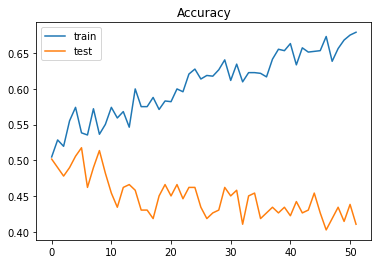

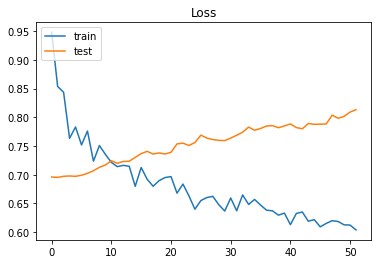

In [540]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train','test'], loc='upper left')
plt.show()
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train','test'], loc='upper left')
plt.show()

## 4. K-fold

In [431]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

X = np.array(df)
y = np.array(df['victory'],dtype='float64')
X, X_test, y, y_test = train_test_split(X, y, test_size = 0.3)

"""
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    #tf.keras.layers.Dropout(0.2), # dropout -> to reduce overfitting problem
    tf.keras.layers.Dense(1, activation='sigmoid')])
"""
model = tf.keras.models.Sequential([
    tf.keras.layers.BatchNormalization(input_shape = input_shape),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(1,activation='sigmoid'),])

standard_scaler = StandardScaler()


acc_per_fold = []
loss_per_fold = []
kf = KFold(n_splits=5)

fold_no = 1


for train, test in kf.split(X):
    X_train, X_val = X[train], X[test]
    y_train, y_val = y[train], y[test]
    
    X_train_real = pd.DataFrame(X_train).iloc[:,3:-1]
    X_val_real = pd.DataFrame(X_val).iloc[:,3:-1]
    X_train_scaled = standard_scaler.fit_transform(X_train_real)
    X_val_scaled = standard_scaler.transform(X_val_real)

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    hist = model.fit(X_train_scaled, y_train, epochs=50)
    scores = model.evaluate(X_val_scaled, y_val, verbose=2)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])
    fold_no = fold_no + 1

print(np.mean(cv_accuracy))

Epoch 1/50
28/28 [==============================] - 1s 5ms/step - loss: 0.9486 - accuracy: 0.5107
Epoch 2/50
28/28 [==============================] - 0s 6ms/step - loss: 0.8848 - accuracy: 0.5051
Epoch 3/50
28/28 [==============================] - 0s 7ms/step - loss: 0.8170 - accuracy: 0.5469
Epoch 4/50
28/28 [==============================] - 0s 5ms/step - loss: 0.7478 - accuracy: 0.5797
Epoch 5/50
28/28 [==============================] - 0s 5ms/step - loss: 0.7394 - accuracy: 0.5785
Epoch 6/50
28/28 [==============================] - 0s 5ms/step - loss: 0.7626 - accuracy: 0.5480
Epoch 7/50
28/28 [==============================] - 0s 5ms/step - loss: 0.7434 - accuracy: 0.5605
Epoch 8/50
28/28 [==============================] - 0s 5ms/step - loss: 0.7298 - accuracy: 0.5525
Epoch 9/50
28/28 [==============================] - 0s 5ms/step - loss: 0.6930 - accuracy: 0.5887
Epoch 10/50
28/28 [==============================] - 0s 5ms/step - loss: 0.6887 - accuracy: 0.5853
Epoch 11/50
28/28 [

In [432]:
print(acc_per_fold)
print(loss_per_fold)

[50.90090036392212, 59.45945978164673, 64.25339579582214, 78.28054428100586, 79.638010263443]
[0.8130896687507629, 0.7156276702880859, 0.6957575678825378, 0.5085650682449341, 0.42636799812316895]


In [435]:
X_test = pd.DataFrame(X_test).iloc[:,3:-1]
X_test_scaled = standard_scaler.transform(X_test)

In [446]:
from sklearn.metrics import *
y_pred = model.predict(X_test_scaled).ravel()
for i in range(len(y_pred)):
  if y_pred[i] >= 0.5:
    y_pred[i] = 1
  elif y_pred[i] < 0.5:
    y_pred[i] = 0 
y_test = list(y_test)
acc = accuracy_score(y_test, y_pred)
print(acc)

475
475
0.5073684210526316


* 다층 퍼셉트론 모델

In [ ]:
# 0. 사용할 패키지 불러오기
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import random

# 1. 데이터셋 생성하기
x_train = np.random.random((1000, 12))
y_train = np.random.randint(2, size=(1000, 1))
x_test = np.random.random((100, 12))
y_test = np.random.randint(2, size=(100, 1))

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(64, input_dim=12, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 3. 모델 학습과정 설정하기
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=1000, batch_size=64)

# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.set_ylim([0.0, 1.0])
acc_ax.set_ylim([0.0, 1.0])

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
acc_ax.plot(hist.history['acc'], 'b', label='train acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

# 6. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('loss_and_metrics : ' + str(loss_and_metrics))